In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

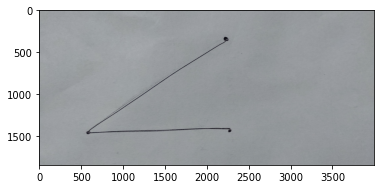

In [38]:
og_image = cv2.imread("/work/a.jpg")

plt.imshow(og_image)
plt.show()

# Convert Image to Grayscale with 3 dims

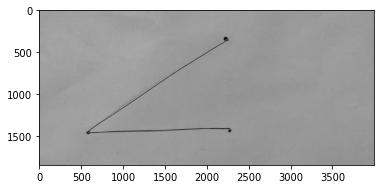

In [39]:
image = og_image.mean(axis =2,keepdims = True)/255.0
image = np.concatenate([image]*3,axis = 2)

plt.imshow(image)
plt.show()

In [40]:
vert_filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
hori_filter = [[-1,0,1],[-2,0,2],[-1,0,1]]
n,m,d = image.shape

# Vertical Edges

In [15]:
# VERTICAL EDGE

vertical_image = np.zeros_like(image)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = image[row-1:row+2,col-1:col+2,0]
        transformed_pixel = vert_filter*local_pixels
        vert_score = (transformed_pixel.sum()+4)/8
        vertical_image[row,col] = [vert_score]*3

plt.imshow(vertical_image)
plt.show()

# Horizontal Edges

In [17]:

horizontal_image = np.zeros_like(image)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = image[row-1:row+2,col-1:col+2,0]
        transformed_pixel = hori_filter*local_pixels
        horizontal_score = (transformed_pixel.sum()+4)/8
        horizontal_image[row,col] = [horizontal_score]*3

plt.imshow(horizontal_image)
plt.show()

# Combined Edge Detection

In [44]:
edge_image = np.zeros_like(image)

for row in range(3,n-2):
    for col in range(3,m-2):

        local_pixels = image[row-1:row+2,col-1:col+2,0]

        vertical_transformed_pixel = vert_filter*local_pixels
        vert_score = vertical_transformed_pixel.sum()/4

        horizontal_transformed_pixel = hori_filter*local_pixels
        horizontal_score = horizontal_transformed_pixel.sum()/4

        edge_score = (vert_score**2 + horizontal_score**2)**0.5
        edge_image[row,col] = [edge_score]*3

edge_image = edge_image/edge_image.max()


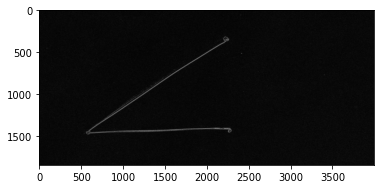

In [45]:
plt.imshow(edge_image)
plt.show()